# Modelo de Rozenberg 4.1
08/05/22

Historial de cambios:
Modificaciones vs Rozemberg 3.1
- A partir de ahora la variable n solo se usa como contador para ir recorriendo los bines.
- Se modifico el calculo de probabilidades de transicion de vacancias, considerando los casos de los extremos de la zona de contactos
- Se agregaron y modificaron graficos para entender donde esta el problema
- Se elimino parte del codigo que no era necesario

### Comienzo del programa
***
Se importan las librerías de las funciones a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parametros iniciales del programa
***
Se definen los valores y datos a utilizar para el desarrollo del problema:


<img src="Modelo de Rozenberg 01.jpg">

In [2]:
###Definicion de mis variabales en Python
N=  100                         #Cantidad de bines
n = list(range(0,N))            #VARIABLE CONTADOR --> Va de 0 a 99: total 100 elementos
NR= 10                          #Parametro - tamaño de la zona de contactos

### Definicion de las rampas de Potencial
***
0 --> Vmax --> 0 --> -Vmax      en tiempo s

* **_Vmax_**               : Voltaje maximo
* **_V0 =_** _Vmax*0.016_    : constante adimensional  
* **_s_**                  : tiempo que dura cada ciclo
* **_n_ciclos_**           : numero de ciclos totales
* **_tau= n_ciclos * s_**  : tiempo total del experimento

En cada paso temporal de la simulacion t (1<= t <=tau) se aplica un voltaje externo V(t)  

La corriente del sistema es I(t)= V(t)/rhotot

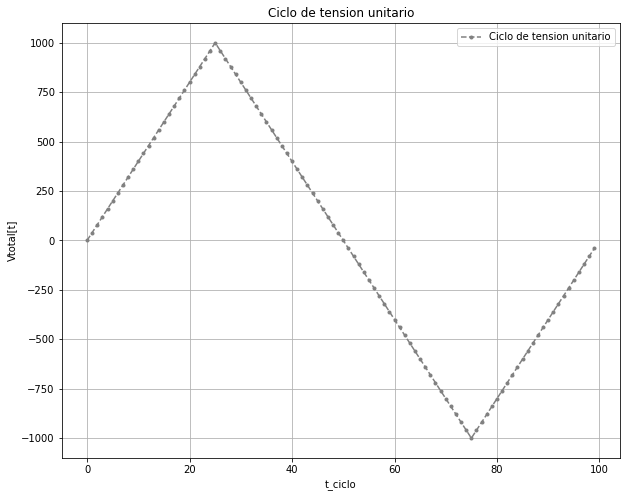

In [3]:
#Ciclo de tension unitario
Vmax = 1000                #Seteado asi en Rozenberg
s = 100                    #Cantidad de time steps t que componen un ciclo de tension unitario
k = Vmax / (s/4)           #Pendiente de la rampa

#Definimos un ciclo de tension unitario
t_ciclo_unitario = list(range(0,s)) 
V_unitario = list(range(0,s))

V0 = Vmax * 0.016            #Seteado asi en Rozemberg

for t in t_ciclo_unitario:
    if (0 <= t <s/4):
        V_unitario[t]= k*t
    if (s/4 <= t <=s*3/4):
        V_unitario[t]= 2*Vmax-k*t
    if (s*3/4 < t <=s):
        V_unitario[t]= -4*Vmax+k*t

plt.rc('figure', figsize=(10, 8))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(t_ciclo_unitario, V_unitario, '.', linestyle='dashed', label='Ciclo de tension unitario', color='grey')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Vtotal[t]')
plt.title('Ciclo de tension unitario')
plt.grid(True)

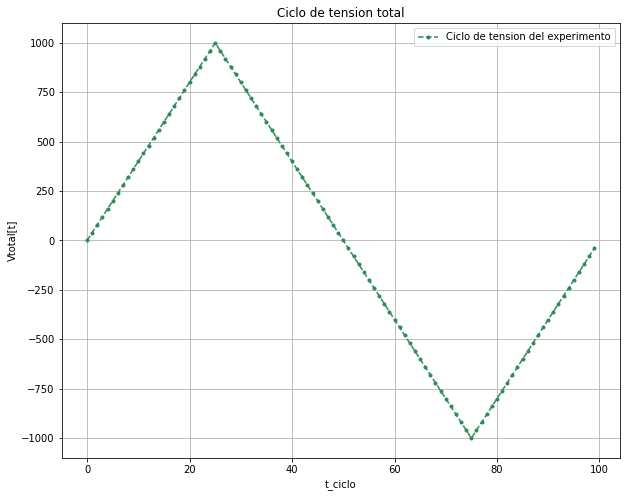

In [4]:
#Ciclo de tension del experimento --> puede contener varios ciclos de tension unitarios
n_ciclos= 1                  #Cantidad de ciclos que componen el experimento
tau= n_ciclos*s              #Tiempo total del experimento
t_ciclo = list(range(0,tau))
V_total = list(range(0,0))

#if n_ciclos>1:
cont_ciclos=list(range(0,n_ciclos))
for k in cont_ciclos:
        #V_total2.extend(V_total)
        V_total=V_total+V_unitario

#print(t_ciclo)
#print(V_total2)

plt.rc('figure', figsize=(10, 8))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(t_ciclo, V_total, '.', linestyle='dashed', label='Ciclo de tension del experimento', color='seagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Vtotal[t]')
plt.title('Ciclo de tension total')
plt.grid(True)

### Parametros de movilidad de los contactos
***
Se definen los parametros de movilidad para cada sitio "n". Se usan mas adelante en el calculo de probabilidades de transicion de vacancias.

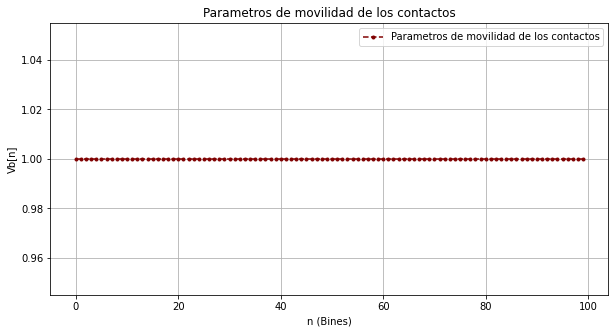

In [19]:
vb= list(range(0,N))            #Listado - movilidad de cada sitio i
VBA=1                           #Parametros - movilidad en extremos
VBB=1                           #Parametros - movilidad en el nucleo

for i in n:
    if i <= NR:
        vb[i]=VBA
    elif i >=len(n)-NR:   #obtengo long de la lista n
        vb[i]=VBA
    else:
        vb[i]=VBB
        
plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(n, vb, '.', linestyle='dashed', label='Parametros de movilidad de los contactos', color='#800000')
plt.legend()
plt.xlabel('n (Bines)')
plt.ylabel('Vb[n]')
plt.title('Parametros de movilidad de los contactos')
plt.grid(True)

### Densidad de vacancias inicial y total
***
La densidad de vacancias iniciales se setean en 10E-4  
La densidad de vacancias total sera la sumatoria de todas las vacancias locales

La densidad total de vacancias es
0.009999999999999995


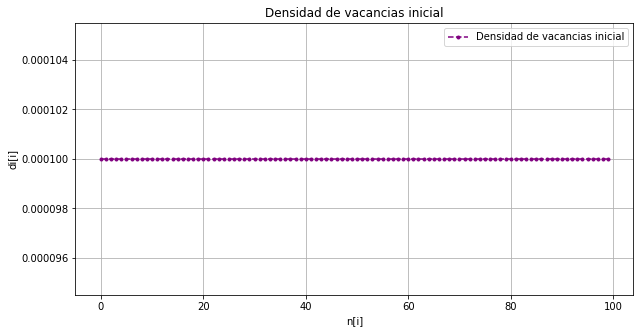

In [16]:
#Densidad de vacancias inicial --> 10E-4 Rozemberg
di= list(range(0,N)) 
for i in n:
    di[i]=0.0001

#Densidad de vacancias total
dtot=0
for i in n:
    dtot=dtot+di[i]

print("La densidad total de vacancias es")
print(dtot)
    
    
plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(n, di, '.', linestyle='dashed', label='Densidad de vacancias inicial', color='purple')
plt.legend()
plt.xlabel('n[i]')
plt.ylabel('di[i]')
plt.title('Densidad de vacancias inicial')
plt.grid(True)

### Resistividades locales
***
Se determinan los parametros para calcular las resistividades locales y posteriormente la resistividad total (sumatoria de las resistividades locales)  
* *Fact* son constantes en cada sector de la muestra  
* La resistividad de cada sitio se define como:  
                R(i) = A(i) * di(i)

In [7]:
rho= list(range(0,N))         #Variable de resistividad local
AL = 1000                    #Valores seteados asi en Rozemberg et all
AR = 1000
AB = 1

rho_total= list(range(0,tau))    ##Resistencia total
#rho_izq  = list(range(0,tau))    ##Resistencia izquierda
#rho_der  = list(range(0,tau))    ##Resistencia derecha

### Definicion de otras variables
***


In [8]:
i_total= list(range(0,tau))

delta = list(range(0,N))
piip1 = list(range(0,N))
pip1i = list(range(0,N))
piim1 = list(range(0,N))
pim1i = list(range(0,N))
deltap= list(range(0,N))
deltam= list(range(0,N))

dtot=list(range(0,tau))

### Cuerpo del codigo
***

In [9]:
for t in t_ciclo:
    rho_total[t]=0
    #rho_izq[t]=0
    #rho_der[t]=0
    
    #Calculamos densidad de vacancias totales en cada tiempo t del ciclo
    dtot[t]=0
    for i in n:
        dtot[t]=dtot[t]+di[i]
        
    #Calculamos resistencias locales
    for i in n:
        if i <= NR:
            rho[i]=AL*di[i]
        elif i >=len(n)-NR:
            rho[i]=AR*di[i]
        else:
            rho[i]=AB*di[i]
    #Resistencias totales
    for i in n:
        rho_total[t]= rho_total[t]  + rho[i]

    #Corriente total
    i_total[t]= V_total[t]/rho_total[t] 

    #Calculo de las probabilidades de transicion entre sitios   im1 <-> i <-> ip1 
    for i in n:
        delta[i]=0
    
    for i in n:
        #Condiciones de borde extremo derecho
        if i==99:
            piip1[i]= 0 #di[i]  *(1-0)       *np.exp(-vb[i]  +i_total[t]* rho[i]/2  )
            pip1i[i]= 0
            piim1[i]= di[i]  *(1-di[i-1]) *np.exp(-vb[i]  -i_total[t]* rho[i]/2  )
            pim1i[i]= di[i-1]*(1-di[i])   *np.exp(-vb[i-1]+i_total[t]* rho[i-1]/2)

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i])
            else:
                deltap[i]=-min(-deltap[i],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i],1-di[i-1])
            else:
                deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

            delta[i]=deltap[i]+deltam[i]
            
        #Condiciones de borde extremo izquierdo
        elif i==0:
            piip1[i]= di[i]  *(1-di[i+1]) *np.exp(-vb[i]  +i_total[t]* rho[i]/2  )
            pip1i[i]= di[i+1]*(1-di[i])   *np.exp(-vb[i+1]-i_total[t]* rho[i+1]/2)
            piim1[i]= 0
            pim1i[i]= 0

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i],1-di[i+1])
            else:
                deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i])
            else:
                deltam[i]=-min(-deltam[i],1-di[i])

            delta[i]=deltap[i]+deltam[i]
        
        #Calculo en el bulk
        else:
            piip1[i]= di[i]  *(1-di[i+1]) *np.exp(-vb[i]  +i_total[t]* rho[i]/2  )
            pip1i[i]= di[i+1]*(1-di[i])   *np.exp(-vb[i+1]-i_total[t]* rho[i+1]/2)
            piim1[i]= di[i]  *(1-di[i-1]) *np.exp(-vb[i]  -i_total[t]* rho[i]/2  )
            pim1i[i]= di[i-1]*(1-di[i])   *np.exp(-vb[i-1]+i_total[t]* rho[i-1]/2)

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i],1-di[i+1])
            else:
                deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i],1-di[i-1])
            else:
                deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

            delta[i]=deltap[i]+deltam[i]
            
    #Se actualiza la densidad local de vacancias, di(i)
    for i in n:
        di[i]=di[i]-delta[i]


### Grafica de los resultados
***
1. Graficamos Vtotal normalizada en funcion de Vmax vs Resistencia total  
2. Graficamos Itotal vs Resistencia total
3. Graficamos Vtotal normalizada en funcion de Itotal normalizada 

Text(0.5, 1.0, '')

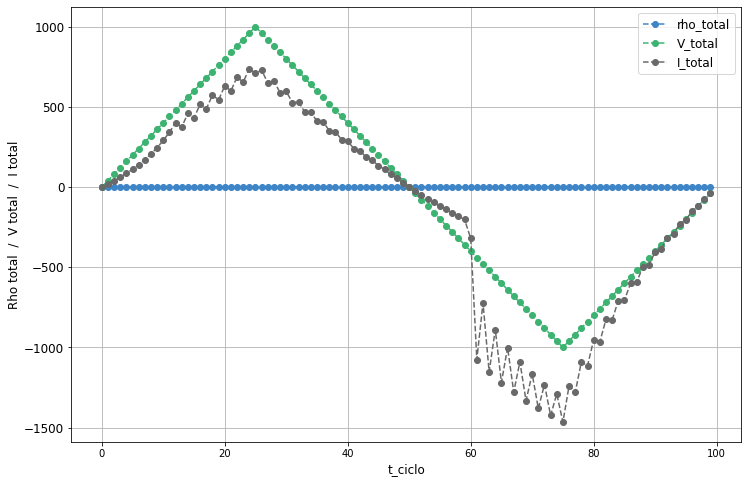

In [10]:
#print(rho_total)
#print(V_total)
#print(i_total)

plt.rc('figure', figsize=(12, 8))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo, rho_total, 'o', linestyle='dashed', label='rho_total', color='#3d85c6')
plt.plot(t_ciclo, V_total, 'o', linestyle='dashed', label='V_total', color='mediumseagreen')
plt.plot(t_ciclo, i_total, 'o', linestyle='dashed', label='I_total',  color='dimgray')
plt.legend()
plt.xlabel('t_ciclo', fontsize=12)
plt.ylabel('Rho total  /  V total  /  I total', fontsize=12)
plt.title('', fontsize=20)

### Grafica de los resultados
***
1. Graficamos Vtotal normalizada en funcion de Vmax vs Resistencia total  
2. Graficamos Itotal vs Resistencia total
3. Graficamos Vtotal normalizada en funcion de Itotal normalizada 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Text(0.5, 1.0, 'Rho_total vs t_ciclo')

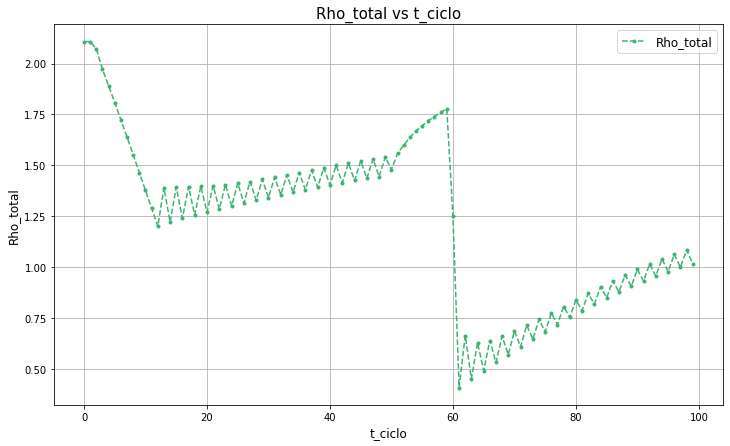

In [11]:
print(t_ciclo)
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo, rho_total,'.', linestyle='dashed', label='Rho_total', color='mediumseagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Rho_total')
plt.title('Rho_total vs t_ciclo', fontsize=15)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Text(0.5, 1.0, 'Densidad total de vacancias vs t_ciclo')

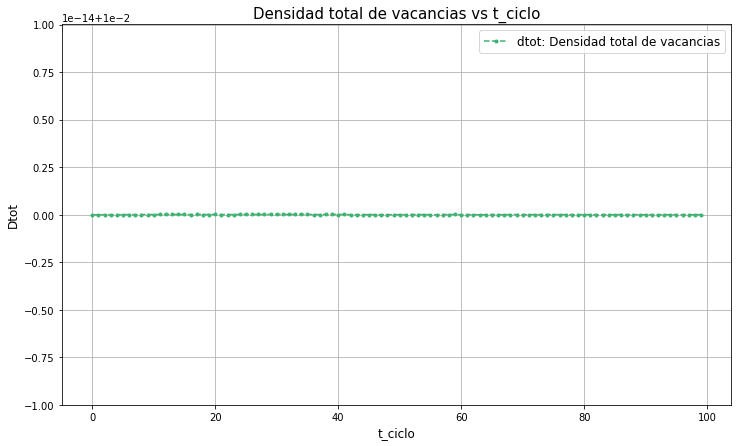

In [12]:
print(t_ciclo)
#print(dtot)

# Se puede ver que la densidad total de vacancias se mantiene constante a lo largo del experimento --> no hay fuga de vacancias aparentemente?

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo, dtot,'.', linestyle='dashed', label='dtot: Densidad total de vacancias', color='mediumseagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Dtot')
plt.title('Densidad total de vacancias vs t_ciclo', fontsize=15)

Text(0.5, 1.0, 'Rho_total vs V_normalizada')

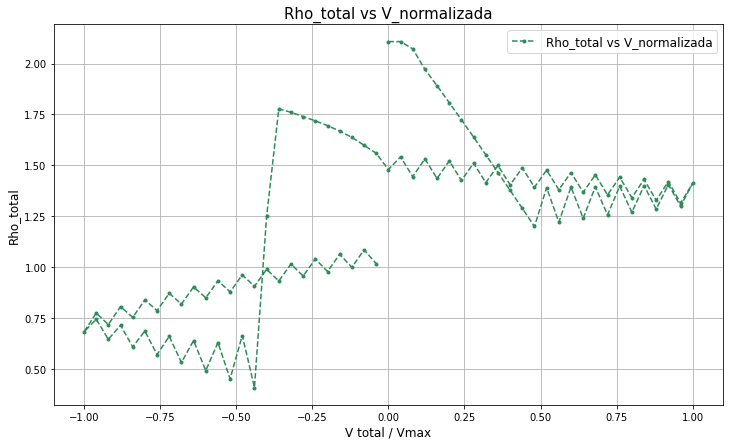

In [13]:
#print(rho_total)
#print(V_total)
V_normalizada= list(range(0,tau))
for t in t_ciclo:
    V_normalizada[t]= V_total[t]/Vmax

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(V_normalizada, rho_total, '.', linestyle='dashed', label='Rho_total vs V_normalizada', color='seagreen')
plt.legend()
plt.xlabel('V total / Vmax')
plt.ylabel('Rho_total')
plt.title('Rho_total vs V_normalizada', fontsize=15)

Text(0.5, 1.0, 'Rho_total vs I total/Imax')

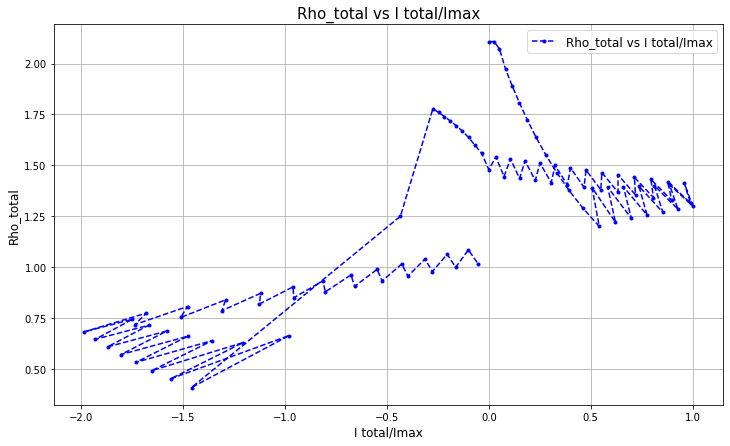

In [14]:
imax=max(i_total)

i_normalizada= list(range(0,tau))
for t in t_ciclo:
    i_normalizada[t]= i_total[t]/imax

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(i_normalizada, rho_total, '.', linestyle='dashed', label='Rho_total vs I total/Imax', color='blue')
plt.legend()
plt.xlabel('I total/Imax')
plt.ylabel('Rho_total')
plt.title('Rho_total vs I total/Imax', fontsize=15)

Text(0.5, 1.0, 'V total/Vmax vs I total/Imax')

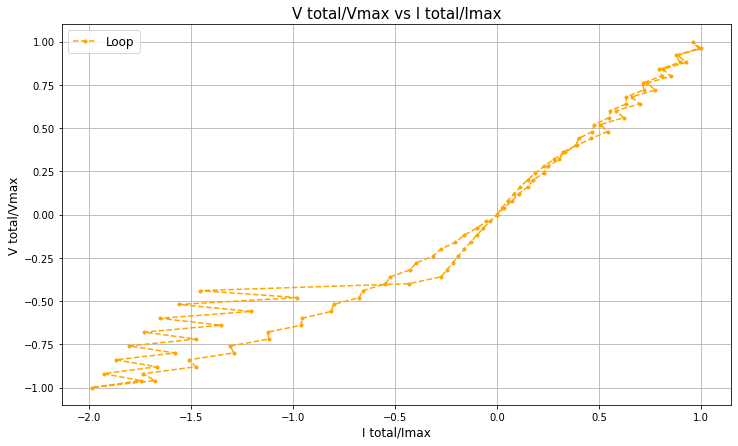

In [15]:
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(i_normalizada, V_normalizada, '.', linestyle='dashed', label='Loop', color='orange')
plt.legend()
plt.xlabel('I total/Imax')
plt.ylabel('V total/Vmax')
plt.title('V total/Vmax vs I total/Imax', fontsize=15)